# Image Labeling (Edu)

## Imports and Parameters

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

sys.path.append("../Library/")
import image_download as imd
import image_manipulation as ima
import db_connection as dbcon

#%matplotlib inline
%load_ext autoreload
%autoreload 2

#from PIL import Image
#import imageio
#from IPython.display import display, clear_output
#
#from dotenv import load_dotenv
#import os
#load_dotenv("../.env")
#import csv

In [2]:
# parameters
GMAPS_API_KEY = os.getenv('GMAPS_API_KEY')
IMG_FOLDER = os.getenv('MFP_IMG_FOLDER')
DATASET = 'gmaps'

# connect to db
db = dbcon.connect("../credentials/mlab_db.txt","mfp")
images_lib_col = db["images_lib"]

DB Credentials from file
DB connected successfully!!!


---

## Load filenames from DB

In [6]:
MAX_IMG_TO_LABEL = 50 # limit the images to label

query = {
    "$and" : [
        {"dataset":DATASET},
        {"label_multi_er": {"$exists": False} },
        {"label_binary_er": {"$exists": False} },
        {"gist": {"$exists": True} },
        #{"gist": {"$exists": False} }
    ]  
}

images_metadata = [img_metadata for img_metadata in images_lib_col.find(query)]
print(len(images_metadata), "query matches\n")

images_filenames = [image["filename"] for image in images_metadata[:MAX_IMG_TO_LABEL]]
print(len(images_filenames), "images to label:")
for image in images_filenames[:10]:
    print(image)
    
# Get image info of all the files of area name provided above (filenames, images, np.array)
images_info = ima.load_images_from_gdrive(images_filenames, IMG_FOLDER + DATASET + "/")

1456 query matches

50 images to label:
US8_33.56985021840991_-104.79955812200403_15_640.png
US8_33.56985021840991_-104.79955812200403_16_640.png
US9_42.330354414274595_-74.33612713739481_13_640.png
US9_42.330354414274595_-74.33612713739481_14_640.png
US9_42.330354414274595_-74.33612713739481_15_640.png
US9_42.330354414274595_-74.33612713739481_16_640.png
US9_41.38218233592528_-113.96288048056118_13_640.png
US9_41.38218233592528_-113.96288048056118_14_640.png
US9_41.38218233592528_-113.96288048056118_15_640.png
US9_41.38218233592528_-113.96288048056118_16_640.png


## Start labeling app and save csv

THIS WILL OPEN AN INTERACTIVE WINDOW FOR LABELLING THE IMAGES!!!

* FIRST PUT IN YOUR NAME AND THEN GO AHEAD WITH LABELLING
* Click ENTER without input to stop labelling

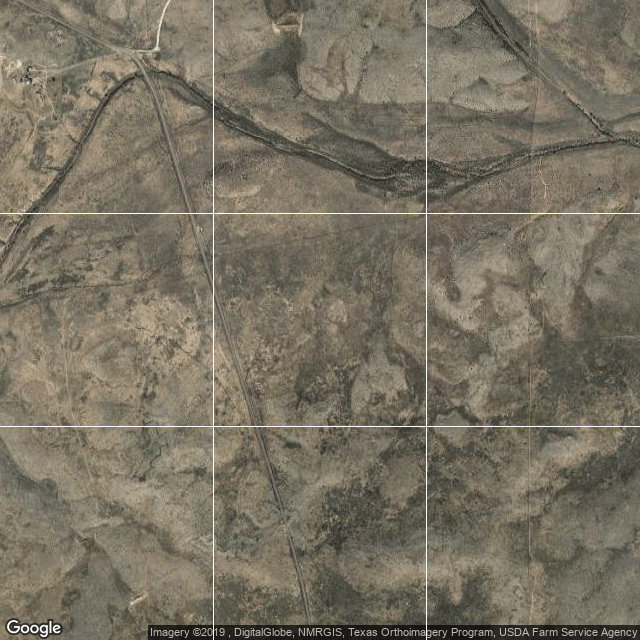

3 / 50
US8_33.56985021840991_-104.79955812200403_15_640.png

Multiclass: 0-9 cells with human impact
Binary:     0 = no human impact, 1 = human impact

Provide multiclass label: 


ValueError: invalid literal for int() with base 10: ''

In [4]:
filename_upload_to_db = 'labels/ER - ' + str(datetime.datetime.today())[:19].replace(':','.') + '.csv'

images_info = ima.add_labels_and_save_csv(images_info, IMG_FOLDER, filename_upload_to_db)

## Load labels into DB

In [5]:
dbcon.write_labels_from_csv_to_db(images_lib_col, IMG_FOLDER, filename_upload_to_db)

loading labels 'label_multi_er' and 'label_binary_er' from file 'labels/ER - 2019-03-27 14.35.26.csv' to db ...
2 labels added to db!


---

## Check labels

### Number of labels

In [9]:
query = {
    "$and" : [
        #{ "name":"Spain" },
        {"label_multi_er": {"$exists": True} },
        #{"gist": {"$exists": True} },
        #{"gist": {"$exists": False} }
    ]  
}

images_metadata = [img_metadata for img_metadata in images_lib_col.find(query)]
print(len(images_metadata), "query matches\n")

412 query matches



### Binary labels

In [35]:
label_name = 'label_binary_er'
query = {label_name: '0'}

doc = images_lib_col.find(query)
for x in doc:
    print(x['filename'], "has label", x[label_name])

Barcelona_41.410605353795084_2.256397435446208_15_640.png has label 0
Barcelona_41.36939464620492_2.256397435446208_15_640.png has label 0
Barcelona_41.32818393861475_2.2014658118154027_15_640.png has label 0
Barcelona_41.32818393861475_2.256397435446208_15_640.png has label 0
Barcelona_41.4425_2.2596_16_600.png has label 0
Barcelona_41.3183_2.3124_13_600.png has label 0
Barcelona_41.3183_2.3124_14_600.png has label 0
Chicago_42.03925471535533_-87.64353459570675_15_640.png has label 0
Chicago_42.03925471535533_-87.58860378712025_15_640.png has label 0
Chicago_41.99841823845178_-87.58860378712025_15_640.png has label 0
US1_52.20482183860124_-92.48891258998856_13_640.png has label 0
US1_52.20482183860124_-92.48891258998856_14_640.png has label 0
US1_52.20482183860124_-92.48891258998856_15_640.png has label 0
US1_52.20482183860124_-92.48891258998856_16_640.png has label 0
US1_33.01060691483008_-118.04101400786547_13_640.png has label 0
US2_41.76932454759587_-105.42877312370616_15_640.png 

In [37]:
label_name = 'label_binary_er'
query = {label_name: '1'}

doc = images_lib_col.find(query)
for x in doc:
    print(x['filename'], "has label", x[label_name])

Andorra la Vella_42.5588_1.5956_13_600.png has label 1
Andorra la Vella_42.5588_1.5956_14_600.png has label 1
Andorra la Vella_42.5588_1.5956_15_600.png has label 1
Andorra la Vella_42.5588_1.5956_16_600.png has label 1
Barcelona_41.45181606138525_2.0916025645537917_15_640.png has label 1
Barcelona_41.45181606138525_2.146534188184597_15_640.png has label 1
Barcelona_41.45181606138525_2.2014658118154027_15_640.png has label 1
Barcelona_41.45181606138525_2.256397435446208_15_640.png has label 1
Barcelona_41.410605353795084_2.0916025645537917_15_640.png has label 1
Barcelona_41.410605353795084_2.146534188184597_15_640.png has label 1
Barcelona_41.410605353795084_2.2014658118154027_15_640.png has label 1
Barcelona_41.36939464620492_2.0916025645537917_15_640.png has label 1
Barcelona_41.36939464620492_2.146534188184597_15_640.png has label 1
Barcelona_41.36939464620492_2.2014658118154027_15_640.png has label 1
Barcelona_41.32818393861475_2.0916025645537917_15_640.png has label 1
Barcelona_4

### Images to delete

In [41]:
label_name = 'label_multi_er'
query = {label_name: '10'}

doc = images_lib_col.find(query)
print("Images to delete:")
print()
for x in doc:
    print(x['filename'])

Images to delete:

Barcelona_41.3183_2.3124_15_600.png
Barcelona_41.3183_2.3124_16_600.png
US1_33.01060691483008_-118.04101400786547_14_640.png
US1_33.01060691483008_-118.04101400786547_15_640.png
US1_33.01060691483008_-118.04101400786547_16_640.png
